# Simulated Screen

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pyemittance.load_json_configs import load_configs

In [3]:
CONFIG = load_configs('LCLS2_OTR0H04')
CONFIG.keys()

dict_keys(['beamline_info', 'img_proc', 'meas_pv_info', 'opt_pv_info', 'save_scalar_pvs', 'savepaths'])

In [4]:
CONFIG['meas_pv_info']

{'diagnostic': {'pv': {'name': 'OTRS:HTR:330',
   'image': 'OTRS:HTR:330:Image:ArrayData',
   'nrow': 'OTRS:HTR:330:Image:ArraySize1_RBV',
   'ncol': 'OTRS:HTR:330:Image:ArraySize0_RBV',
   'resolution': 'OTRS:HTR:330:RESOLUTION',
   'profmonxsize': 'OTRS:HTR:330:XRMS',
   'profmonysize': 'OTRS:HTR:330:YRMS',
   'scan': '',
   'xsize': '',
   'ysize': ''},
  'pv_unit': {'resolution': '(um)'}},
 'meas_device': {'pv': {'name': 'QUAD:HTR:120',
   'cntrl': 'QUAD:HTR:120:BCTRL',
   'read': 'QUAD:HTR:120:BACT'},
  'pv_unit': 'kG'},
 'beam_info': {'energy': ''}}

In [5]:
from pyemittance.simulation import Screen

# Blank Screen

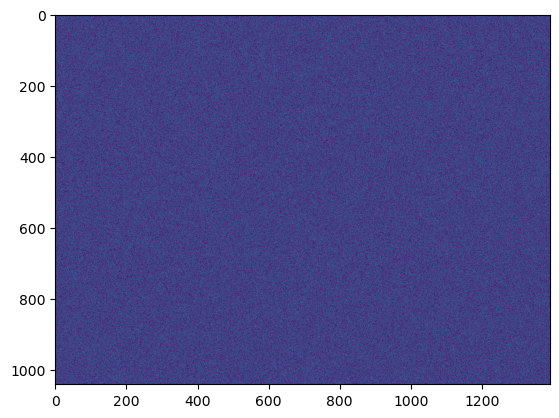

In [6]:
S = Screen(noise=50)
bg = S.background()
plt.imshow(bg, vmax=128)

# Screen with spot

(<matplotlib.image.AxesImage at 0x7f9c0e2a6340>,
 130.88743557535352,
 9793433,
 6700)

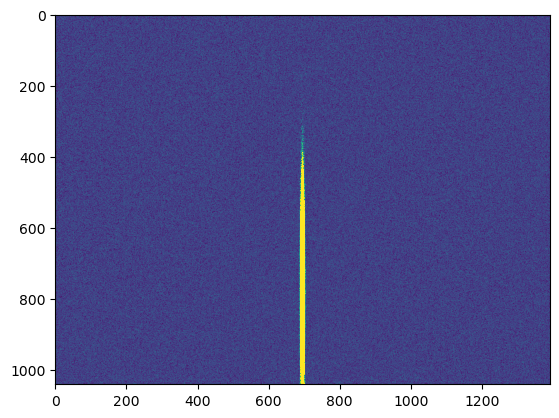

In [7]:
s = S.spot(mean_x = 0, mean_y = -.001, total_charge=100e-12,
           sigma_x = 0.00001,
           sigma_y = 0.000530470,
          n_particle=100_000
          )
plt.imshow(s+bg, vmax=128), s.std(), np.sum(s), s.max()

Text(0, 0.5, 'y (mm)')

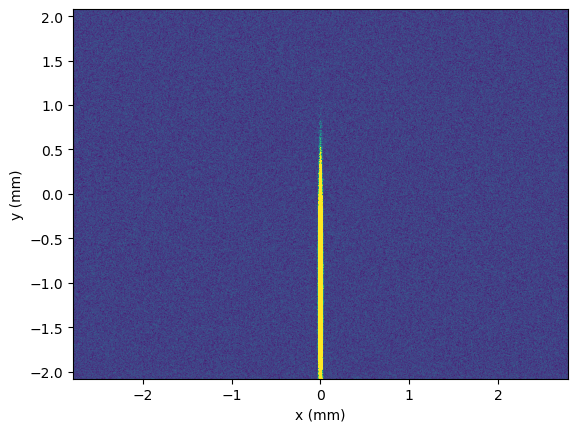

In [8]:
fig, ax = plt.subplots()
ax.imshow(s + bg, extent=1e3*np.array([S.xmin, S.xmax, S.ymin, S.ymax]), vmax=128)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')